> **Krithika Devi Chandran**

> **2211570**

> **CDB22DW022 - Data, AI & ML**

# Bean Leaves Disease Prediction

## Introduction

The goal of this project is to build a machine learning model that can help bean farmers mainly in Africa, detect bean leaves with defects early enough. 

Every year, farmers face economic loss and crop waste due to various diseases in agricultural plants. Here, the model is built on bean leaves. 

The major two common diseases in bean leaf are **Bean Angular Leaf Spot** and **Bean rust**. It is estimated that the major loss occurred in bean yield is due to these diseases. 

* **Bean angular leaf spot** leaves develop small, angular, brown or straw-colored spots with a yellow halo. Leaf spots dry and drop out, leaving irregularly shaped holes in the leaves.

* **Bean rust** leaves look like a reddish brown or rust colored powder on the plants.

**Data Dictionary**

| Crop Names | Disease Types |
|---------------------|--------------------|
| Bean | Healthy |
| Bean | Angular Leaf Spot |
| Bean | Rust |

The original dataset was obtained from [AI-Lab Makerere](https://github.com/AI-Lab-Makerere/ibean/). The images were captured in bean fields by the Makerere AI lab in collaboration with the National Crops Resources Research Institute (NaCRRI), Uganda's national body in charge of agricultural research.

The [dataset](https://www.kaggle.com/code/therealoise/bean-disease-classification/data?select=Bean_Dataset) was already split into train, test, and validation sets. 


## Importing Libraries

**IPython:** tools for interactive and parallel computing in Python.
  
IPython provides a rich architecture for interactive computing with:

1. A powerful interactive shell.
2. A kernel for *Jupyter*.
3. Support for interactive data visualization and use of *GUI toolkits*.
4. Flexible, *embeddable* interpreters to load into your own projects.
5. Easy to use, high performance tools for *parallel computing*.


  * **IPython.display.Image**

    Create a PNG/JPEG/GIF image object given raw data.
When this object is returned by an input cell or passed to the display function, it will result in the image being displayed in the frontend.

  * **IPython.display.display**

    Display a Python object in all frontends.

    By default all representations will be computed and sent to the frontends. Frontends can decide which representation is used and how.


In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os # os module provides functions for interacting with the operating system.

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from IPython.display import Image, display

**TensorFlow Hub** is a repository of trained machine learning models ready for fine-tuning and deployable anywhere. 

The **`tensorflow_hub`** library lets you download and reuse them in your TensorFlow program with a minimum amount of code.

1. Find trained models for transfer learning to save time on training

2. Publish your own models

3. Deploy models on device and in the browser

In [2]:
import tensorflow_hub as hub

## Download the data 

**`!wget`** is used to get the data from the network. It is the non-interactive network downloader which is used to **download files from the server even when the user has not logged on to the system**.

Here, downloading the train, test, and validation data images of bean leaf from googleapis storage.

In [3]:
!wget https://storage.googleapis.com/ibeans/train.zip

!wget https://storage.googleapis.com/ibeans/validation.zip

!wget https://storage.googleapis.com/ibeans/test.zip

--2022-12-21 16:17:33--  https://storage.googleapis.com/ibeans/train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143812152 (137M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 137.15M  44.3MB/s    in 3.3s    

2022-12-21 16:17:36 (41.9 MB/s) - ‘train.zip’ saved [143812152/143812152]

--2022-12-21 16:17:36--  https://storage.googleapis.com/ibeans/validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18504213 (18M) [application/zip]
Saving to: ‘validation.zip’

validation.zip      100%[===================

**`!mkdir`** is a make directory, creating a name of new **`beans`** directory.

In [4]:
!mkdir beans

Unzipping the files from archives of the zip format using **`!unzip`** and adding it into the **`beans/`** folder using **`-d`** command

In [5]:
!unzip train.zip -d beans/

!unzip test.zip -d beans/

!unzip validation.zip -d beans/ 

Archive:  train.zip
   creating: beans/train/
   creating: beans/train/healthy/
   creating: beans/train/angular_leaf_spot/
   creating: beans/train/bean_rust/
  inflating: beans/train/healthy/healthy_train.265.jpg  
  inflating: beans/train/healthy/healthy_train.271.jpg  
  inflating: beans/train/healthy/healthy_train.259.jpg  
  inflating: beans/train/healthy/healthy_train.99.jpg  
  inflating: beans/train/healthy/healthy_train.311.jpg  
  inflating: beans/train/healthy/healthy_train.66.jpg  
  inflating: beans/train/healthy/healthy_train.72.jpg  
  inflating: beans/train/healthy/healthy_train.305.jpg  
  inflating: beans/train/healthy/healthy_train.339.jpg  
  inflating: beans/train/healthy/healthy_train.113.jpg  
  inflating: beans/train/healthy/healthy_train.107.jpg  
  inflating: beans/train/healthy/healthy_train.106.jpg  
  inflating: beans/train/healthy/healthy_train.112.jpg  
  inflating: beans/train/healthy/healthy_train.338.jpg  
  inflating: beans/train/healthy/healthy_trai

Listing out the folder names under **beans** folder using **`!ls`** command.

In [6]:
!ls beans

test  train  validation


**`!find`** is a program for finding files and folders:

* **beans**, a folder name, the directory in which find will try to find files/folders
* **`-type f`** tells find to look only for files (and not directories, special files, etc.)
* **`wc`** is a program to count characters, words, and lines in some text (a file, or the input that you give it).
* **`-l`** tells it to only count lines.
* **`|`** sends the output of find to **`wc`**.

In [7]:
!find beans -type f | wc -l

1296


In [8]:
!find beans/train -type f | wc -l

1035


In [9]:
!find beans/test -type f | wc -l

128


In [10]:
!find beans/validation -type f | wc -l

133


Displaying one sample image of **healthy bean leaf**

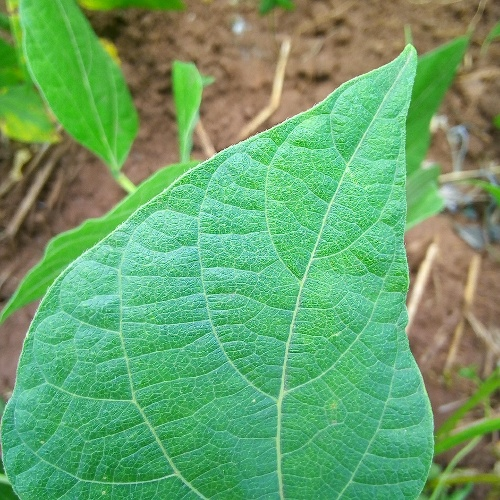

In [17]:
display(Image('beans/train/healthy/healthy_train.0.jpg'))

Displaying one sample image of **bean angular leaf spot**

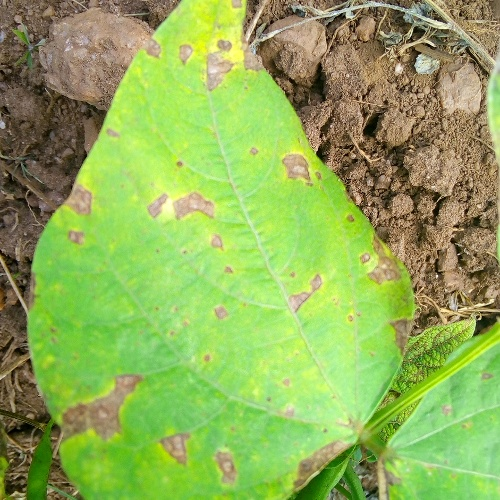

In [23]:
display(Image('beans/train/angular_leaf_spot/angular_leaf_spot_train.124.jpg'))

Displaying one sample image of **bean rust leaf**

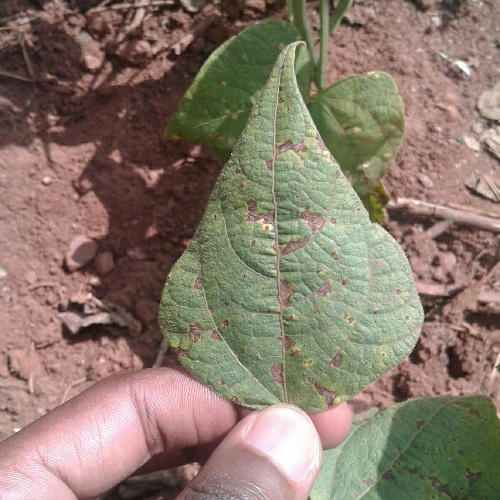

In [28]:
display(Image('beans/train/bean_rust/bean_rust_train.166.jpg'))

Setting Batch size, Image height and Width.

In [61]:
batch_size = 32
img_height = 224
img_width = 224

Generates a **tf.data.Dataset** from image files in a directory.

* **directory:** Directory where the data is located. If labels is "inferred", it should contain subdirectories, each containing images for a class.
* **seed:** random seed for shuffling and transformations.
* **image_size:** Size to resize images to after they are read from disk, specified as (height, width) = (224, 224)
* **batch_size:** Size of the batches of data. Default: 32. If None, the data will not be batched (the dataset will yield individual samples).

A **batch** is a set of samples used in one iteration of training. For example, if you have a dataset of 100 samples, and you want to train a model using mini-batches of size 10, then you would need to run 10 iterations to process the entire dataset, each iteration using a different batch of 10 samples.

Generating a train image files in a directory.

In [62]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/train',
    seed=111,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1034 files belonging to 3 classes.


Generating a test image files in a directory.

In [63]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/test',
    seed=111,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 128 files belonging to 3 classes.


Generating a validation image files in a directory.

In [64]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory('beans/validation',
    seed=111,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [65]:
# Identifying image and label batch numbers
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [66]:
train_dir = "beans/train"
test_dir = "beans/test"
val_dir = "beans/validation"

In [67]:
# Identifying class name of train directory
train_classes = os.listdir(train_dir)
print(train_classes)

# Identifying class name of test directory
test_classes = os.listdir(test_dir)
print(test_classes)

# Identifying class name of validation directory
validation_classes = os.listdir(val_dir)
print(validation_classes)

['bean_rust', 'healthy', 'angular_leaf_spot']
['bean_rust', 'healthy', 'angular_leaf_spot']
['bean_rust', 'healthy', 'angular_leaf_spot']


In [68]:
# creating directory for each class & getting names of all classes in train folder
dir1=[]
names1=[]
print("Total image of each class in training directory:\n")
for i,classes in enumerate(train_classes):
  dir1.append(os.path.join(train_dir+"/"+classes)) #Creating Directory for Each class in Training Data
  names1.append(os.listdir(train_dir+"/"+classes)) # Getting all images in each Directory
  print('Total Images of {}  is {}'.format(classes,len(names1[i]))) 

Total image of each class in training directory:

Total Images of bean_rust  is 348
Total Images of healthy  is 342
Total Images of angular_leaf_spot  is 345


In [69]:
# creating directory for each class & getting names of all classes in test folder
dir2=[]
names2=[]
print("Total image of each class in testing directory:\n")
for i,classes in enumerate(test_classes):
  dir2.append(os.path.join(test_dir+"/"+classes)) #Creating Directory for Each class in Testing Data
  names2.append(os.listdir(test_dir+"/"+classes)) # Getting all images in each Directory
  print('Total Images of {}  is {}'.format(classes,len(names2[i]))) 

Total image of each class in testing directory:

Total Images of bean_rust  is 43
Total Images of healthy  is 42
Total Images of angular_leaf_spot  is 43


In [70]:
# creating directory for each class & getting names of all classes in validation folder
dir3=[]
names3=[]
print("Total image of each class in validation directory:\n")
for i,classes in enumerate(validation_classes):
  dir3.append(os.path.join(val_dir+"/"+classes)) #Creating Directory for Each class in Testing Data
  names3.append(os.listdir(val_dir+"/"+classes)) # Getting all images in each Directory
  print('Total Images of {}  is {}'.format(classes,len(names3[i]))) 

Total image of each class in validation directory:

Total Images of bean_rust  is 45
Total Images of healthy  is 44
Total Images of angular_leaf_spot  is 44


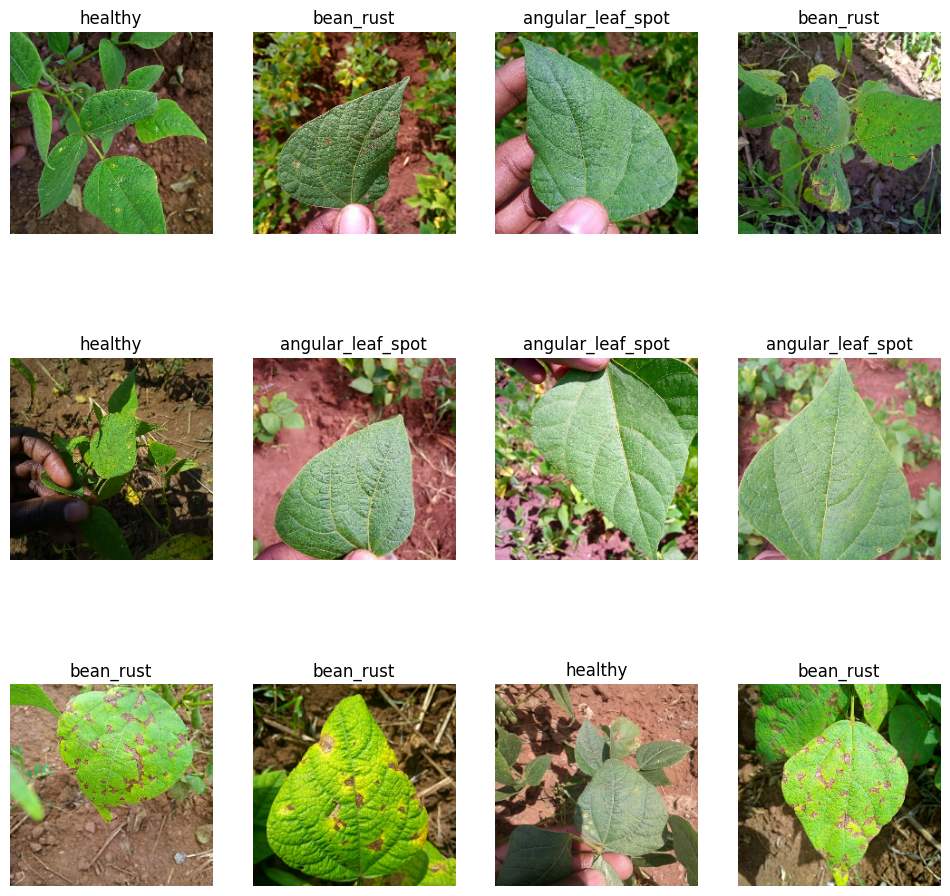

In [75]:
# First 12 images in a batch
plt.figure(figsize=(12, 12))
for image_batch, labels_batch in train_ds.take(1): #  take(1) is referring to the 1st batch of train_ds.
                                            # For eg., If you have defined your batch size as 32.Then the length of train_ds.take(1) will be 32.
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(train_classes[labels_batch[i]])
        plt.axis("off")

The **`tf.data`** API provides the **`tf.data.Dataset.prefetch`** transformation. It can be used to decouple the time when data is produced from the time when data is consumed. In particular, the transformation uses a background thread and an internal buffer to prefetch elements from the input dataset ahead of the time they are requested. The number of elements to prefetch should be equal to (or possibly greater than) the number of batches consumed by a single training step. You could either manually tune this value, or set it to **`tf.data.AUTOTUNE`**, which will prompt the **`tf.data`** runtime to tune the value dynamically at runtime.

The **`.cache()`** transformation can cache a dataset, either in memory or on local storage. This will save some operations (like file opening and data reading) from being executed during each epoch. When you **cache** a dataset, the transformations before the **cache** one (like the file opening and data reading) are executed only during the first epoch. The next epochs will reuse the data cached by the **cache** transformation.

In [100]:
#Using buffered prefetching to load images from disk without having I/O blocking
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [101]:
# Performing data augmentation since the amount of data that we have is not large
data_augmentation_layer = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255), # Rescaling and pre-processing input
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
])

As we seen that tensorflow hub provides pre-trained model, here we're extracting a [feature vectors of images with MobileNet V2 trained on ImageNet (ILSVRC-2012-CLS)](https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4).

The checkpoint exported into this module was **mobilenet_v2_1.0_224/mobilenet_v2_1.0_224.ckpt** downloaded from [MobileNet V2 pre-trained models](https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet/README.md). Its weights were originally obtained by training on the ILSVRC-2012-CLS dataset for image classification ("Imagenet").

This module can be used with the **`hub.KerasLayer`** as follows. It cannot be used with the **`hub.Module`** API for TensorFlow 1

The input images are expected to have color(3 channel) values in the range [0,1], following the [common image input](https://www.tensorflow.org/hub/common_signatures/images#input) conventions. For this module, the size of the input images is fixed to **height x width = 224 x 224 pixels**.

In [102]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [103]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(img_height,img_width,3))

Setting **`trainable = False`** moves all the layer's weights from trainable to non-trainable. This is called **"freezing"** the layer: the state of a frozen layer won't be updated during training (either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

Setting **`trainable`** to **false** is crucial because you want to make sure that this layer isn’t re-trained.

In [104]:
#Freezing the top layers of MobileNetV2
feature_extractor_layer.trainable = False

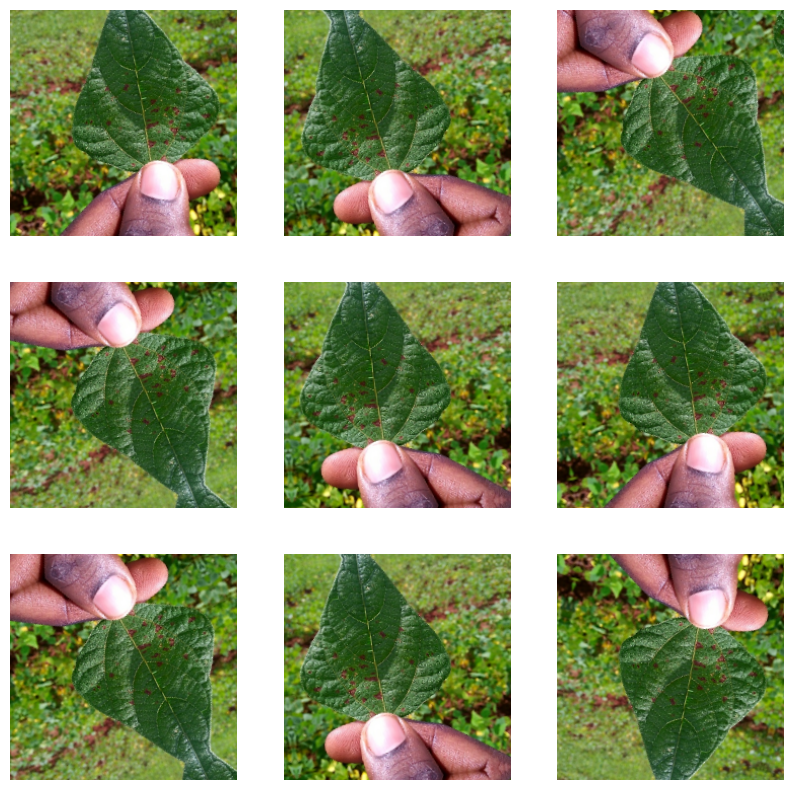

In [109]:
# Dataset after data augmentation
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[1]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation_layer(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0])
    plt.axis('off')

In [110]:
tf.random.set_seed(111) # setting a random seed

## Model Building

In [111]:
base_model = tf.keras.Sequential([
    data_augmentation_layer,
    feature_extractor_layer,
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

## Compiling the model

In [112]:
base_model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001),
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

## Fitting the model

In [114]:
history = base_model.fit(train_ds, epochs=30, validation_data=val_ds)

Epoch 1/30
33/33 [==============================] - 18s 544ms/step - loss: 0.8556 - accuracy: 0.6122 - val_loss: 0.6056 - val_accuracy: 0.7218
Epoch 2/30
33/33 [==============================] - 20s 618ms/step - loss: 0.5679 - accuracy: 0.7679 - val_loss: 0.4666 - val_accuracy: 0.8045
Epoch 3/30
33/33 [==============================] - 17s 525ms/step - loss: 0.4828 - accuracy: 0.7969 - val_loss: 0.4177 - val_accuracy: 0.8346
Epoch 4/30
33/33 [==============================] - 17s 525ms/step - loss: 0.4308 - accuracy: 0.8308 - val_loss: 0.3600 - val_accuracy: 0.8571
Epoch 5/30
33/33 [==============================] - 18s 536ms/step - loss: 0.4047 - accuracy: 0.8443 - val_loss: 0.3355 - val_accuracy: 0.8571
Epoch 6/30
33/33 [==============================] - 17s 522ms/step - loss: 0.3747 - accuracy: 0.8482 - val_loss: 0.3154 - val_accuracy: 0.8647
Epoch 7/30
33/33 [==============================] - 17s 521ms/step - loss: 0.3478 - accuracy: 0.8588 - val_loss: 0.2921 - val_accuracy: 0.8947

In [116]:
base_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 keras_layer_3 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


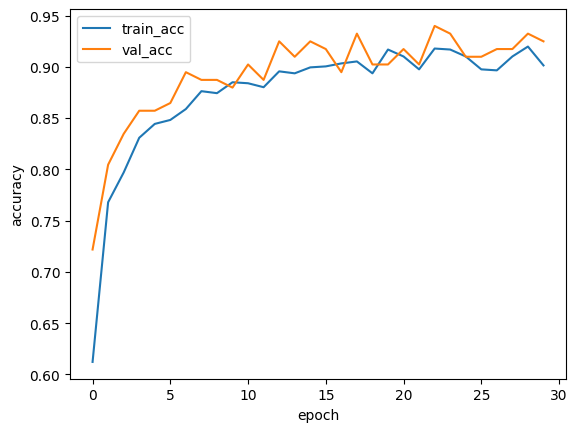

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='best')
plt.show()

## Model Evaluation

In [118]:
train_loss, train_accuracy = base_model.evaluate(train_ds)
print('Train accuracy :', train_accuracy)

33/33 [==============================] - 16s 496ms/step - loss: 0.1747 - accuracy: 0.9323
Train accuracy : 0.9323017597198486


In [119]:
test_loss, test_accuracy = base_model.evaluate(test_ds)
print('Test accuracy :', test_accuracy)

4/4 [==============================] - 2s 418ms/step - loss: 0.2240 - accuracy: 0.9062
Test accuracy : 0.90625


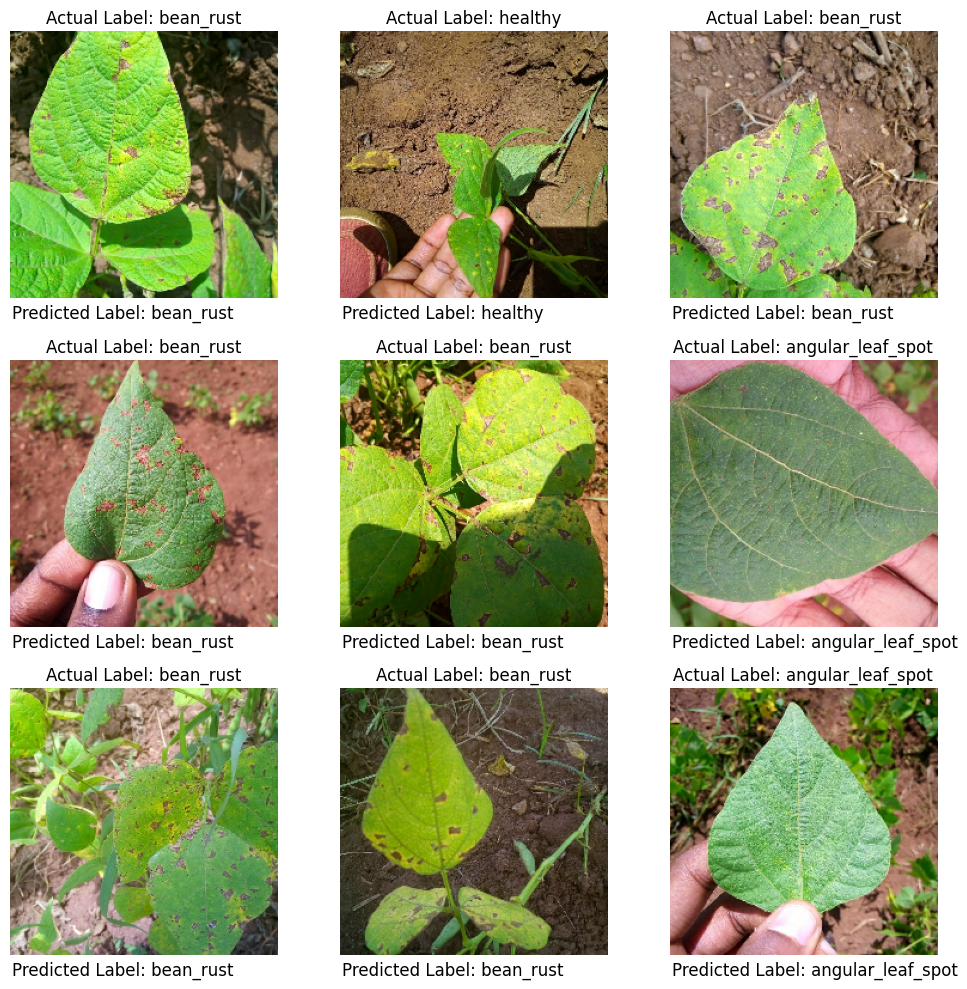

In [127]:
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.tight_layout()
        
        img = tf.keras.preprocessing.image.img_to_array(images[i])                  
        img = np.expand_dims(img, axis=0)  
        pred = base_model.predict(img)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title("Actual Label: %s" % train_classes[labels[i]])
        plt.text(1, 240, "Predicted Label: %s" % train_classes[np.argmax(pred)], fontsize=12)
        plt.axis("off")